# Proyecto Final
##Juan Nicol�s Garc�a
##Olger Mercado
###Materia: M�todos Computacionales


El siguiente notebook tiene como objetivo modelar el movimiento de un solido rigido el cual rebota y rota al mismo tiempo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sc
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

Primera mente se deducen las f�rmulas las cuales van a ser usadas para el programa. Suponemos inicialmente que nuestra pelota tiene una velocidad angular $\omega_1$,una velocidad $V_{0x}$,radio $R$ y masa $m$.Las colisiones dadas son completamente elasticas, entonces por conservacion del momentum angular del punto que choca con el suelo tenemos que:

$$-m V_{0x} R + I \omega_0 = - m V_{1x} R + I \omega_1 \\
 -V_{0x} + \gamma R \omega_0 = - V_{1x} + \gamma R \omega_1\\
 V_{1x} - V_{0x} = -\gamma R ( \omega_0 - \omega_1)
$$

Tambien por conservaci�n de la energ�a tenemos lo siguiente relaci�n:

$$\frac{1}{2} m V_{0x}^{2} + \frac{1}{2} m V_{0y}^{2} + I  \omega_0^{2} = \frac{1}{2} m V_{1x}^{2} + \frac{1}{2} m V_{1y}^{2} + I  \omega_1^{2}\\
V_{0x}^{2} + \gamma R^{2} \omega_0^{2} = V_{1x}^{2} + \gamma R^{2} \omega_0^{2}\\ ( V_{1x} - V_{0x} ) ( V_{1x} + V_{0x}) = \gamma R^{2} (\omega_0 - \omega_1) (\omega_0 + \omega_1)\\
V_{1x} + V_{0x} = -(\omega_0 + \omega_1)R
$$

Ahora suponiendo que la colisi�n es inel�stica sabemos que $V_{0y}=-V_{1y}$ ya no se cumple sino que $V_{0y}= -\epsilon V_{1y}$ donde \epsilon est� entre $0 \leqslant \epsilon \leqslant 1$. Tambien introducimos un coeficiente de restituci�ntranservasal  $\beta$  el cual puede oscilar entre $-1 \leqslant \beta \leqslant 1$, este representa de forma simplificada el deslizamiento del punto de contacto de la pelota con el piso. Como las fuerzas que act�an sobre la bola son la fuerza normal $N$ y la fuerza de rozamiento $F_{r}$ y ambas pasan por el punto de contacto O, el momento angular respecto de este punto se conserva. Por tanto, las ecuaciones que describen el choque inel�stico de una pelota con el suelo son:

$$
V_{0y}= -\epsilon V_{1y}\\
V_{1x} + \omega_1 R = - \beta (V_{0x}+\omega_0 R)\\
V_{1x} - V_{0x} = -\gamma R (\omega_0 - omega_1)
$$

Apartir de las formulas anteriores podemos hallar $V_{1x}$ y $ R \omega_1$ en terminos de los valores iniciales del problema y quedar�an de las siguiente forma:

$$
V_{1x} = \frac{1}{1 + \gamma}((1 - \gamma \beta) V_{0x} - \gamma (1 + \beta) R \omega_0)\\
R \omega_1 = \frac{1}{1 + \gamma}(- (1 + \beta) V_{0x} - (\beta - \gamma) R \omega_0)
$$

Generalizando el problema para el $n$-�simo rebote tenemos:

$$
V_{nx} = \frac{1}{1 + \gamma}((1 - \gamma \beta) V_{n-1x} - \gamma (1 + \beta) R \omega_{n-1})\\
R \omega_n = \frac{1}{1 + \gamma}(- (1 + \beta) V_{n-1x} - (\beta - \gamma) R \omega_{n-1})
$$


* Ac� est�n las condiciones las cuales se pueden modificar

In [2]:
e=0.95
w0=1 #rad/s
y0=50 #m
R=1 #m
beta=0.8
gamma=2/5

Funci�n que modela el movimiento del centro de masa de una pelota que rebota en funci�n del tiempo

In [3]:
def posicionxy(t,y0,e,R,w0,beta,gamma):

  # Inicializar arreglos para las posiciones y velocidades
  y=np.zeros(len(t))
  x=np.zeros(len(t))
  w0lista=np.zeros(len(t))
  v0xlista=np.zeros(len(t))
  v0ylista=np.zeros(len(t))

  # Inicializar variables
  v0x=0
  x0=0
  g=9.8
  t0=0
  contador=1
  v0y=0


  for i in range(len(t)):
    # Calcular posici�n y velocidad en cada paso de tiempo
    y[i]=y0+v0y*(t[i]-t0)-1/2*g*(t[i]-t0)**2
    x[i]=x0+v0x*(t[i]-t0)

    # Condici�n cuando la bola rebota en el suelo por primera vez
    if y[i]<R and contador==1:
      t0=(2*(y0-R)/g)**(1/2)
      v0y=e*(2*g*(y0-R))**(1/2)
      vguardada=v0x
      w0guardada=w0
      v0x=1/(1+gamma)*((1-gamma*beta)*vguardada-gamma*(1+beta)*R*w0guardada)
      w0=1/(1+gamma)*(-(1+beta)*vguardada-(beta-gamma)*R*w0guardada)

      y[i]=R+v0y*(t[i]-t0)-1/2*g*(t[i]-t0)**2
      x[i]=x0+v0x*(t[i]-t0)
      contador+=1
      y0=R
      x0=x[i-1]
      w0lista[i]=w0
      v0xlista[i]=v0x

    # Condici�n para rebotes sucesivos despu�s del primer rebote
    if y[i]<R and contador>1:
      tv=2*v0y/g
      t0=t0+tv
      v0y=(e**contador)*v0y
      vguardada=v0x
      w0guardada=w0
      v0x=1/(1+gamma)*((1-gamma*beta)*vguardada-gamma*(1+beta)*R*w0guardada)
      w0=1/(1+gamma)*(-(1+beta)*vguardada+(gamma-beta)*R*w0guardada)
      y[i]=y0+v0y*(t[i]-t0)-1/2*g*(t[i]-t0)**2
      x[i]=x0+v0x*(t[i]-t0)
      contador+=1
      x0=x[i-1]
      w0lista[i]=w0
      v0xlista[i]=v0x

    # Condici�n cuando la bola est� sobre el suelo
    if y[i]>R:
      y[i]=y0+v0y*abs(t[i]-t0)-1/2*g*(t[i]-t0)**2
      x[i]=x0+v0x*(t[i]-t0)
      w0lista[i]=w0
      v0xlista[i]=v0x

    # Condici�n para detener la bola si su velocidad vertical es baja
    if contador>1 and v0y<1E-4:
      y[i]=R
      x[i]=x0+v0x*(t[i]-t0)

      w0lista[i]=w0
      v0xlista[i]=v0x



  return x,y,v0xlista,w0lista

In [4]:
t=np.linspace(0,50,100000)
a=np.linspace(0.1,0.99,10)
restitucion=np.round(a,3)

##Gr�fica del movimiento en Y en funci�n del tiempo

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


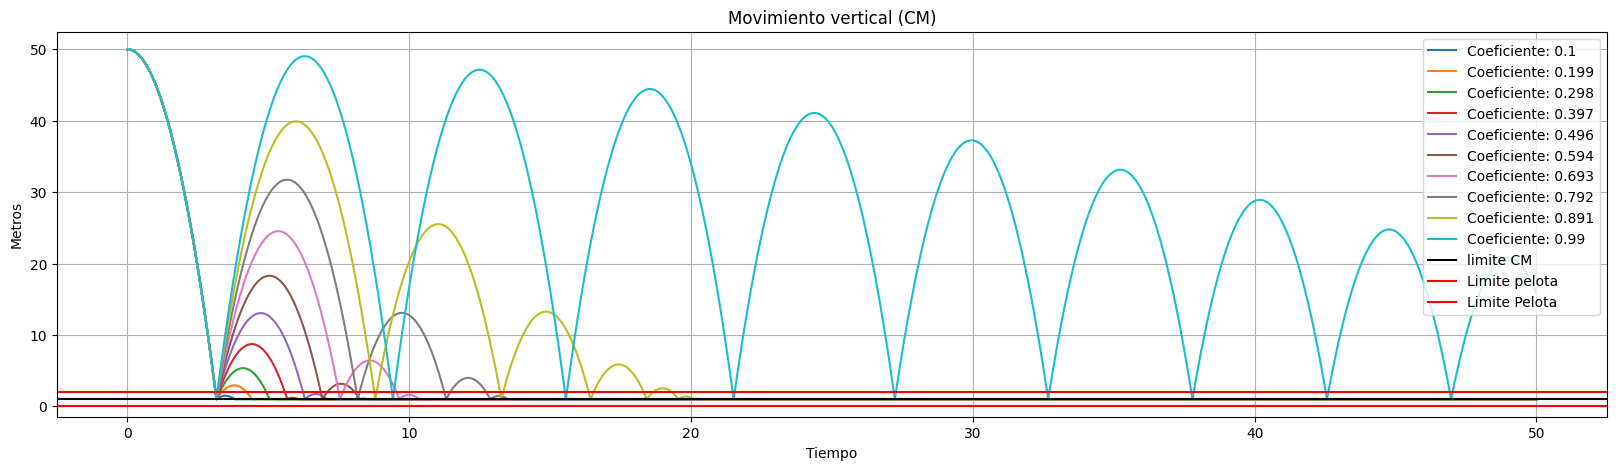

In [5]:
plt.figure(figsize=(20,5))
for i in range(len(restitucion)):
  plt.plot(t,posicionxy(t,y0,restitucion[i],R,w0,beta,gamma)[1],label="Coeficiente: %a"%restitucion[i])
plt.title("Movimiento vertical (CM)")
plt.axhline(y=R,color="black",label="limite CM")
plt.axhline(y=2*R,color="red",label="Limite pelota")
plt.axhline(y=0,color="red",label="Limite Pelota")
plt.xlabel("Tiempo")
plt.ylabel("Metros")
plt.grid()
plt.legend()
plt.legend()

##Gr�fica de la trayectoria del centro de masa

In [6]:
w0prueba=np.linspace(-2,2,10)

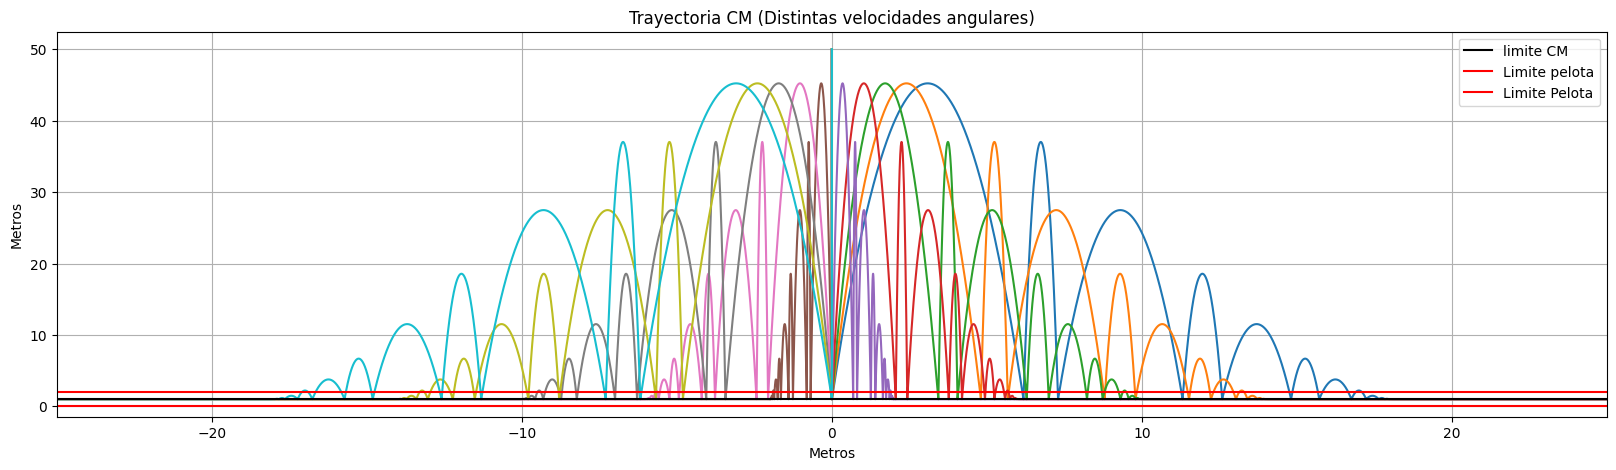

In [7]:
plt.figure(figsize=(20,5))
for j in range(len(w0prueba)):
  plt.plot(posicionxy(t,y0,e,R,w0prueba[j],beta,gamma)[0], posicionxy(t,y0,e,R,w0prueba[j],beta,gamma)[1])

plt.title("Trayectoria CM (Distintas velocidades angulares)")
plt.axhline(y=R,color="black",label="limite CM")
plt.axhline(y=2*R,color="red",label="Limite pelota")
plt.axhline(y=0,color="red",label="Limite Pelota")
plt.xlabel("Metros")
plt.ylabel("Metros")
plt.xlim(-25,25)
plt.grid()
plt.legend()

##Gr�fica de la velocidad angular con respecto al tiempo

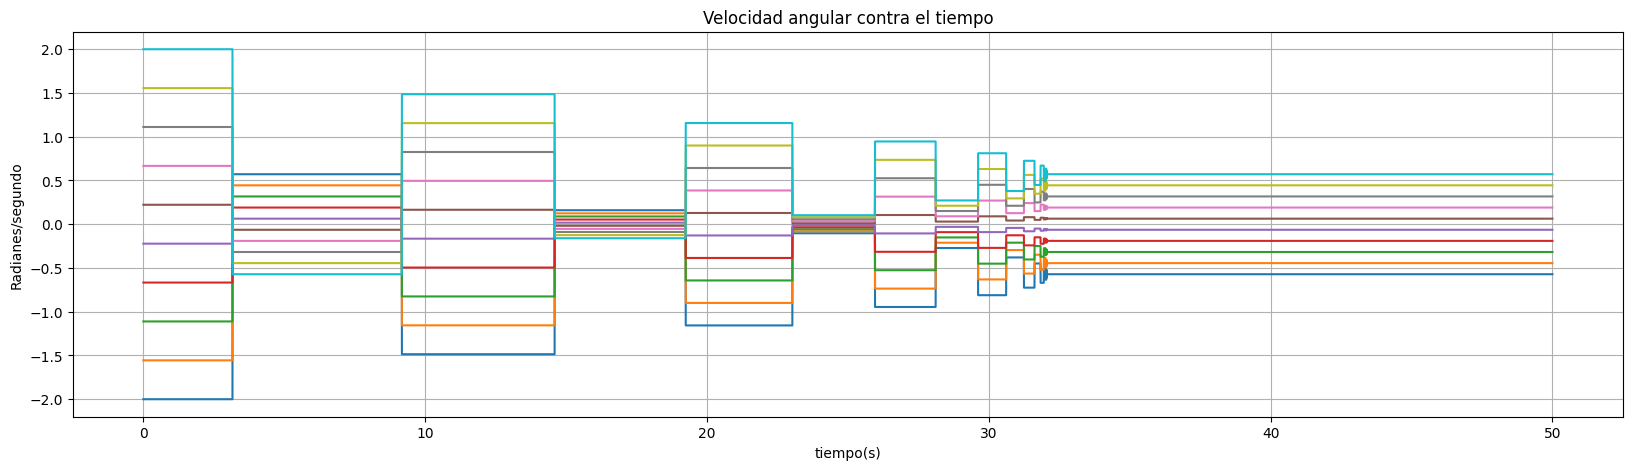

In [8]:
plt.figure(figsize=(20,5))
for j in range(len(w0prueba)):
  plt.plot(t,posicionxy(t,y0,e,R,w0prueba[j],beta,gamma)[3])
plt.title("Velocidad angular contra el tiempo")
plt.xlabel("tiempo(s)")
plt.ylabel("Radianes/segundo")
plt.grid()

##Gr�fica de la posici�n en x con respecto al tiempo

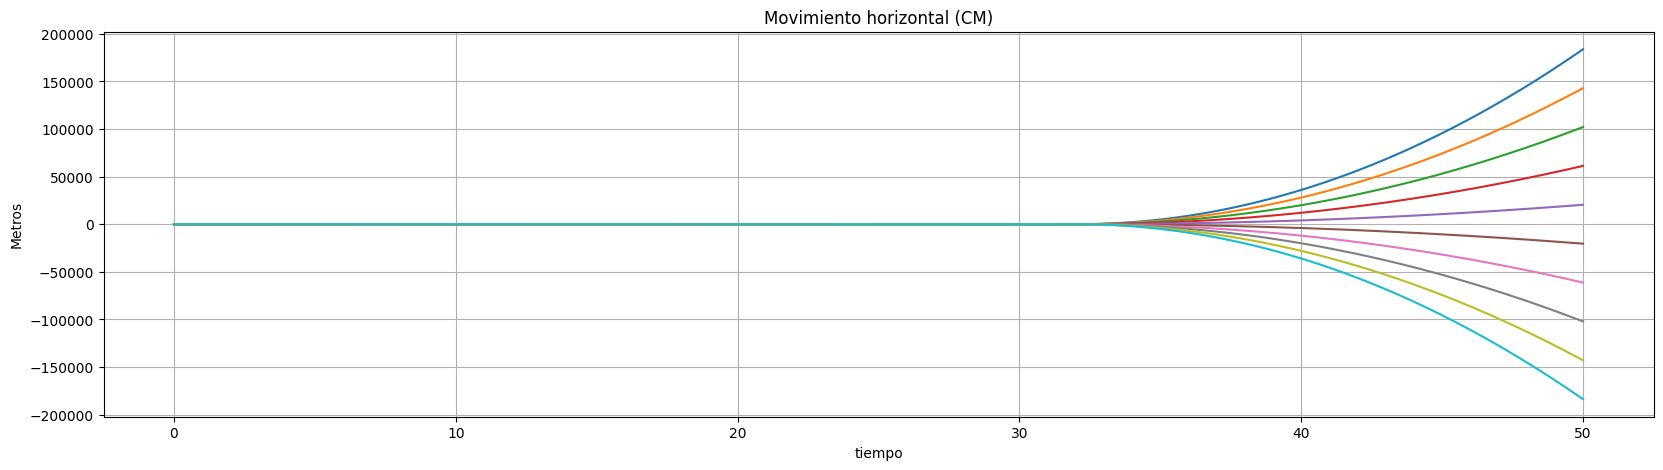

In [9]:
plt.figure(figsize=(20,5))
for j in range(len(w0prueba)):
  plt.plot(t,posicionxy(t,y0,e,R,w0prueba[j],beta,gamma)[0])
plt.title("Movimiento horizontal (CM)")
plt.xlabel("tiempo")
plt.ylabel("Metros")
plt.grid()

##Gr�fica de la velocidad con respecto al tiempo

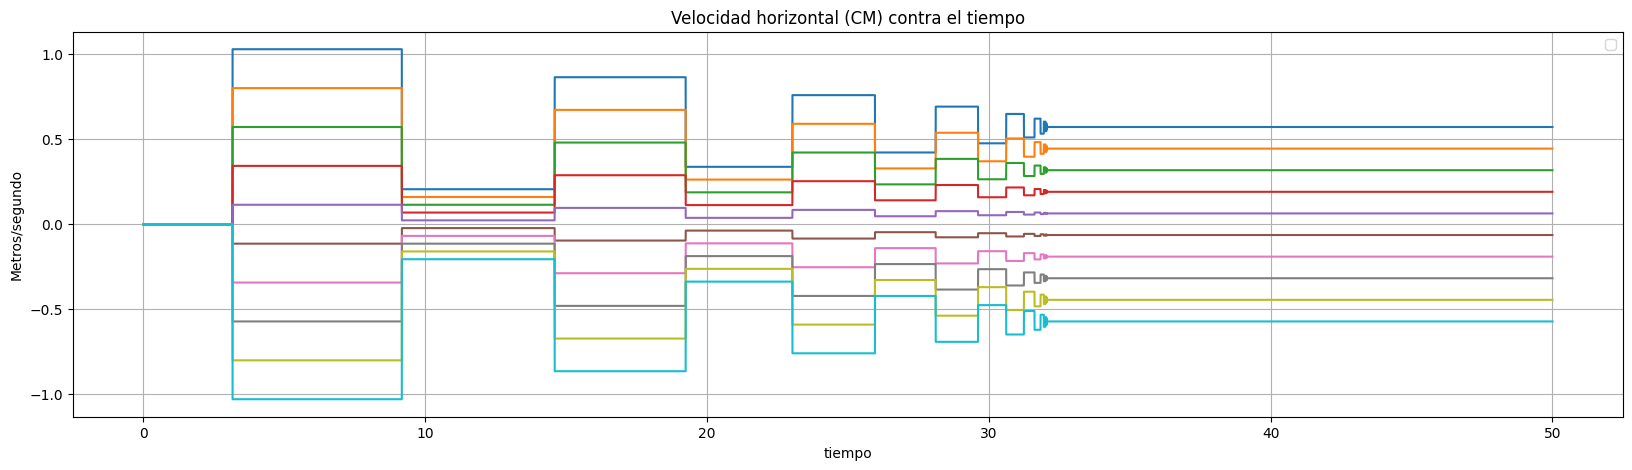

In [10]:
plt.figure(figsize=(20,5))
for j in range(len(w0prueba)):
  plt.plot(t,posicionxy(t,y0,e,R,w0prueba[j],beta,gamma)[2])
plt.title("Velocidad horizontal (CM) contra el tiempo")
plt.xlabel("tiempo")
plt.ylabel("Metros/segundo")
plt.grid()
plt.legend()

##Animaci�n.

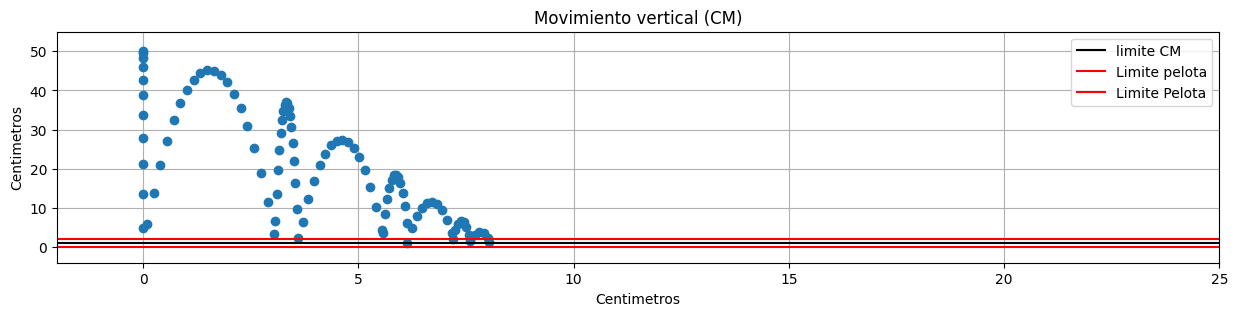

In [12]:
e=0.95
w0=-1
y0=50
R=1
beta=0.95
gamma=2/5
t1 = np.linspace(0, 30, 100)
restitucion = 0.95
beta1=0.8
#  figura y ejes
fig, ax = plt.subplots(figsize=(15,3))

# L�mites de los ejes
ax.set_xlim(-2,25)
ax.set_ylim(min(posicionxy(t1, y0, restitucion, R, w0, beta1, gamma)[1]) - 5,
            max(posicionxy(t1, y0, restitucion, R, w0, beta1, gamma)[1]) + 5)

# l�nea vac�a para la animaci�n
ln, = plt.plot([], [], 'o')

# Etiquetas y leyenda
plt.title("Movimiento vertical (CM)")
plt.axhline(y=R, color="black", label="limite CM")
plt.axhline(y=2*R, color="red", label="Limite pelota")
plt.axhline(y=0, color="red", label="Limite Pelota")

plt.xlabel("Centimetros")
plt.ylabel("Centimetros")
plt.grid()
plt.legend()

# Funci�n de inicializaci�n
def init():
    return ln,

# Definir la funci�n para la animaci�n
def update(frame):
    x, y, _, _ = posicionxy(t1[:frame], y0, restitucion, R, w0, beta1, gamma)

    # Actualizar los datos de la l�nea
    ln.set_data(x, y)

    return ln,

# Crear la animaci�n
ani = FuncAnimation(fig, update, frames=len(t1), init_func=init, blit=True)

# Mostrar la animaci�n en el cuaderno
HTML(ani.to_jshtml())

# Referecias.
 + [Una pelota que rebota en el suelo](http://www.sc.ehu.es/sbweb/fisica3/solido/choque_suelo/choque_suelo.html)
 + [Ca�da de una bola que gira sobre s� misma](http://www.sc.ehu.es/sbweb/fisica3/solido/pelota_rebota/pelota_rebota.html)
 + [Animaciones](https://colab.research.google.com/drive/175OXd7JnYK26tG0-0ap4-_pZsPqyMIzX#scrollTo=Cqsvfw9Shr9p)